# Phase 3 Data Science Training Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
# Assume tar.gz file to be extracted at project directory.
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict


def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def transform_Data(batch):
    features = batch["data"].reshape((len(batch["data"]), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch["labels"]
    return features, labels

In [3]:
def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = transform_Data(unpickle(cifar10_dataset_folder_path+"/data_batch_" + str(batch_id)))
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))

    plt.figure()
    plt.title(f"Batch: {batch_id}, image id: {sample_id}, Label: {sample_label}")
    plt.imshow(sample_image)


Stats of batch #1:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 1005
Label Counts of [1](AUTOMOBILE) : 974
Label Counts of [2](BIRD) : 1032
Label Counts of [3](CAT) : 1016
Label Counts of [4](DEER) : 999
Label Counts of [5](DOG) : 937
Label Counts of [6](FROG) : 1030
Label Counts of [7](HORSE) : 1001
Label Counts of [8](SHIP) : 1025
Label Counts of [9](TRUCK) : 981

Example of Image 3483:
Image - Min Value: 0 Max Value: 240
Image - Shape: (32, 32, 3)

Stats of batch #2:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 984
Label Counts of [1](AUTOMOBILE) : 1007
Label Counts of [2](BIRD) : 1010
Label Counts of [3](CAT) : 995
Label Counts of [4](DEER) : 1010
Label Counts of [5](DOG) : 988
Label Counts of [6](FROG) : 1008
Label Counts of [7](HORSE) : 1026
Label Counts of [8](SHIP) : 987
Label Counts of [9](TRUCK) : 985

Example of Image 5945:
Image - Min Value: 0 Max Value: 255
Image - Shape: (32, 32, 3)

Stats of batch #3:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 

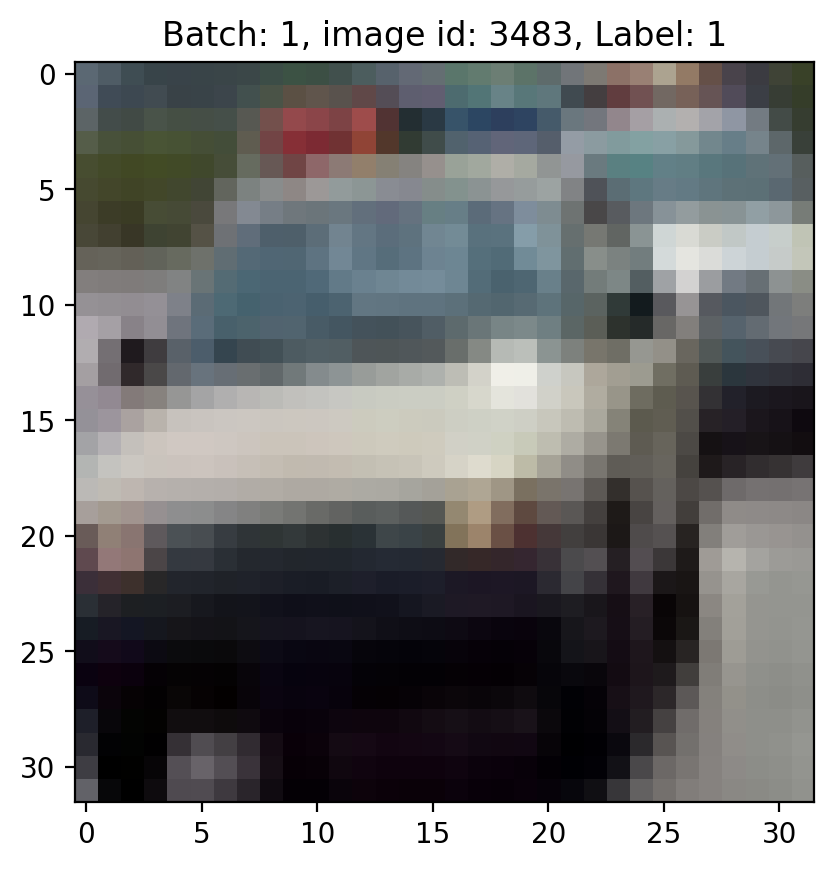

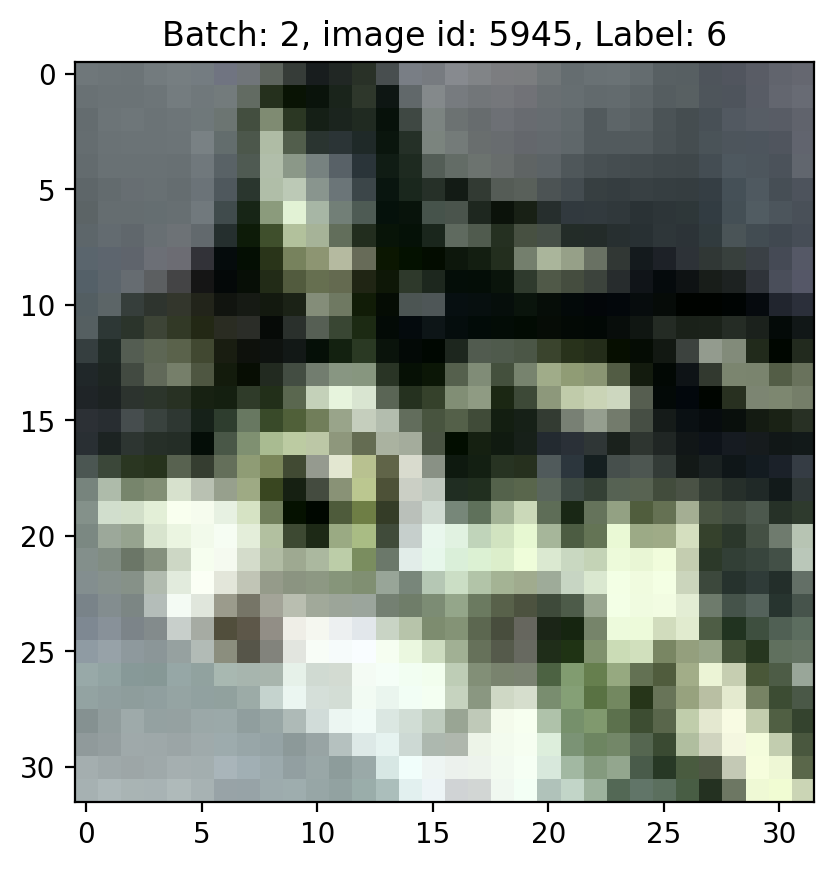

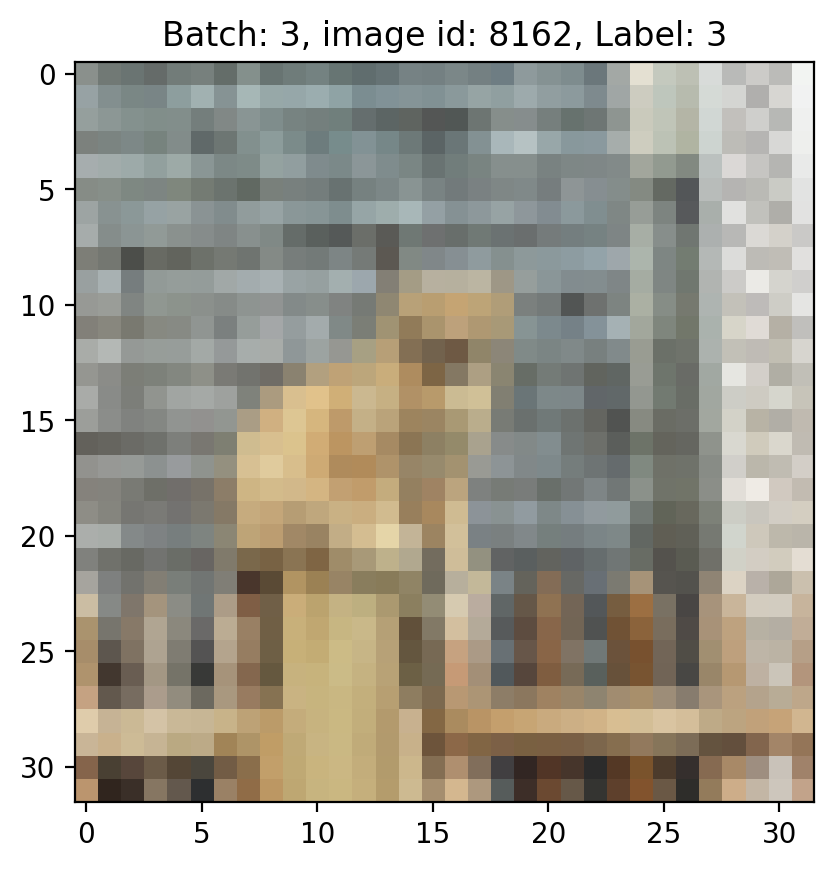

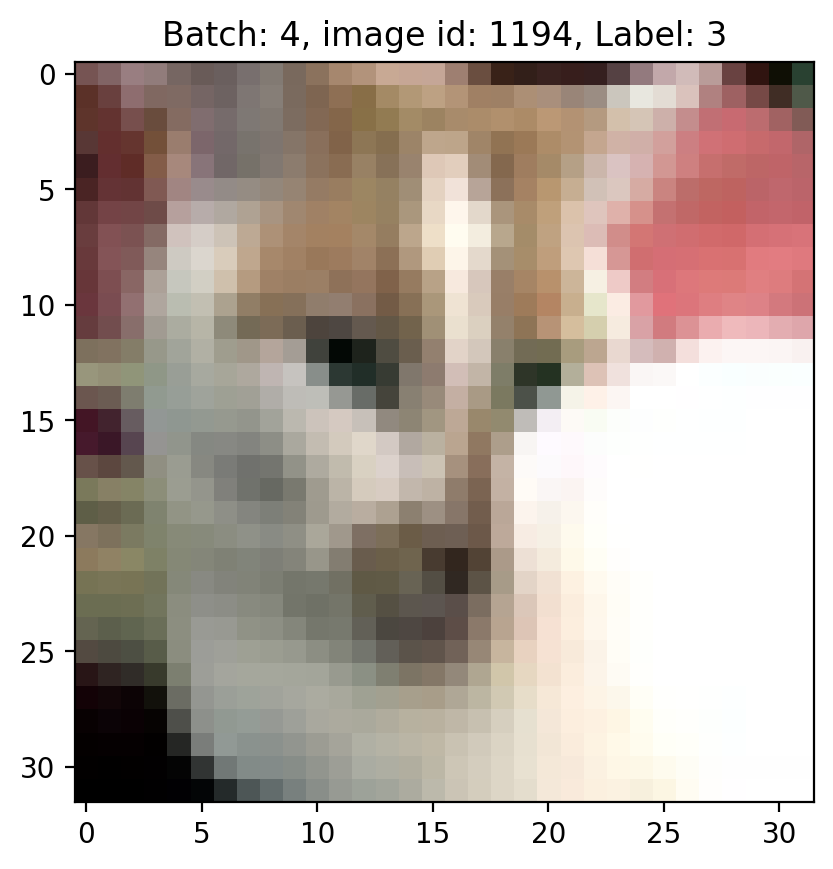

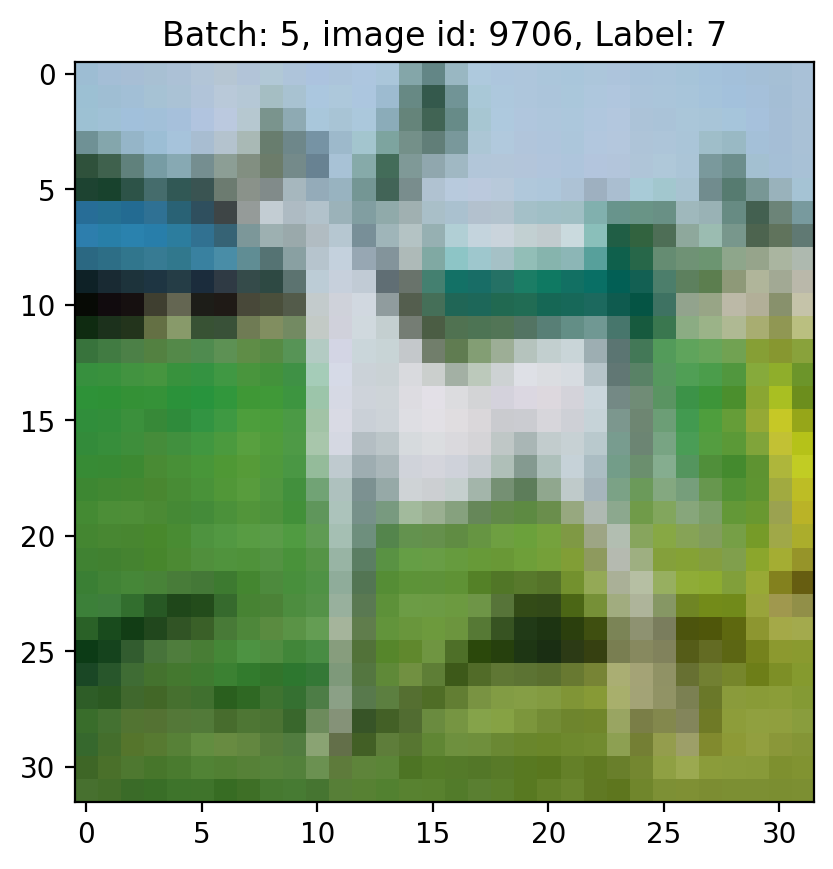

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

data_Dir = "./cifar-10-batches-py"
# Explore the dataset
batch_id = 3
sample_id = 7000
for i in range(1, 6):
    display_stats(data_Dir, i, np.random.randint(10000))
    


# Data Processing

In [5]:
import tensorflow as tf

train_x = []
train_y = []
for i in range(1,6):
    data = unpickle("./cifar-10-batches-py/data_batch_" + str(i))
    features, labels = transform_Data(data)
    for feature, label in zip(features, labels):
        train_x.append(feature)
        train_y.append(label)
train_x = np.array(train_x)
train_y = tf.one_hot(np.array(train_y).astype(np.int32), depth=10)

test_x = []
test_y = []
data = unpickle("./cifar-10-batches-py/test_batch")
features, labels = transform_Data(data)
for feature, label in zip(features, labels):
    test_x.append(feature)
    test_y.append(label)
test_x = np.array(test_x)
test_y = np.array(test_y)
test_y = tf.one_hot(np.array(test_y).astype(np.int32), depth=10)

# Data Modelling

In [6]:
import tensorflow as tf
from tensorflow.keras import Input, layers, Sequential, optimizers, losses, callbacks
from datetime import datetime

In [7]:
batch_size = 500
num_classes = 10
epochs = 70

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_x.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(train_x, train_y, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/70
100/100 [==============================] - 9s 47ms/step - loss: 5.9282 - acc: 0.1527
Epoch 2/70
100/100 [==============================] - 5s 47ms/step - loss: 1.9757 - acc: 0.2758
Epoch 3/70
100/100 [==============================] - 5s 47ms/step - loss: 1.7754 - acc: 0.3497
Epoch 4/70
100/100 [==============================] - 5s 48ms/step - loss: 1.6580 - acc: 0.3907
Epoch 5/70
100/100 [==============================] - 5s 47ms/step - loss: 1.5714 - acc: 0.4271
Epoch 6/70
100/100 [==============================] - 5s 48ms/step - loss: 1.5195 - acc: 0.4489
Epoch 7/70
100/100 [==============================] - 5s 49ms/step - loss: 1.4586 - acc: 0.4720
Epoch 8/70
100/100 [==============================] - 5s 47ms/step - loss: 1.4123 - acc: 0.4892
Epoch 9/70
100/100 [==============================] - 5s 47ms/step - loss: 1.3731 - acc: 0.5087
Epoch 10/70
100/100 [==============================] - 5s 48ms/step - loss: 1.3359 - acc: 0.5212
Epoch 11/70
100/100 [==================

In [8]:
model.save('output/my_model')

INFO:tensorflow:Assets written to: output/my_model\assets


# 4. Evaluate the model

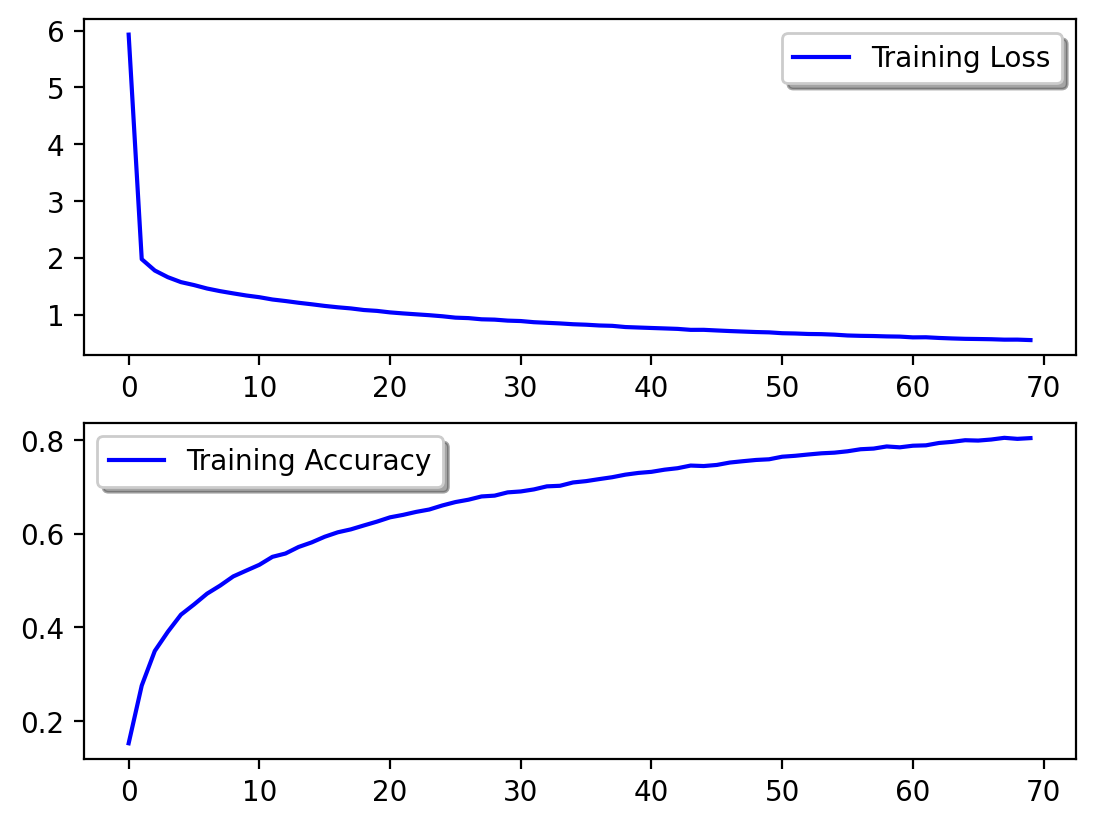

In [9]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [10]:
test_loss, test_acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 6s 17ms/step - loss: 0.6949 - acc: 0.7647


In [11]:
# Predict the values from the validation dataset
y_pred = model.predict(test_x)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(test_y,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

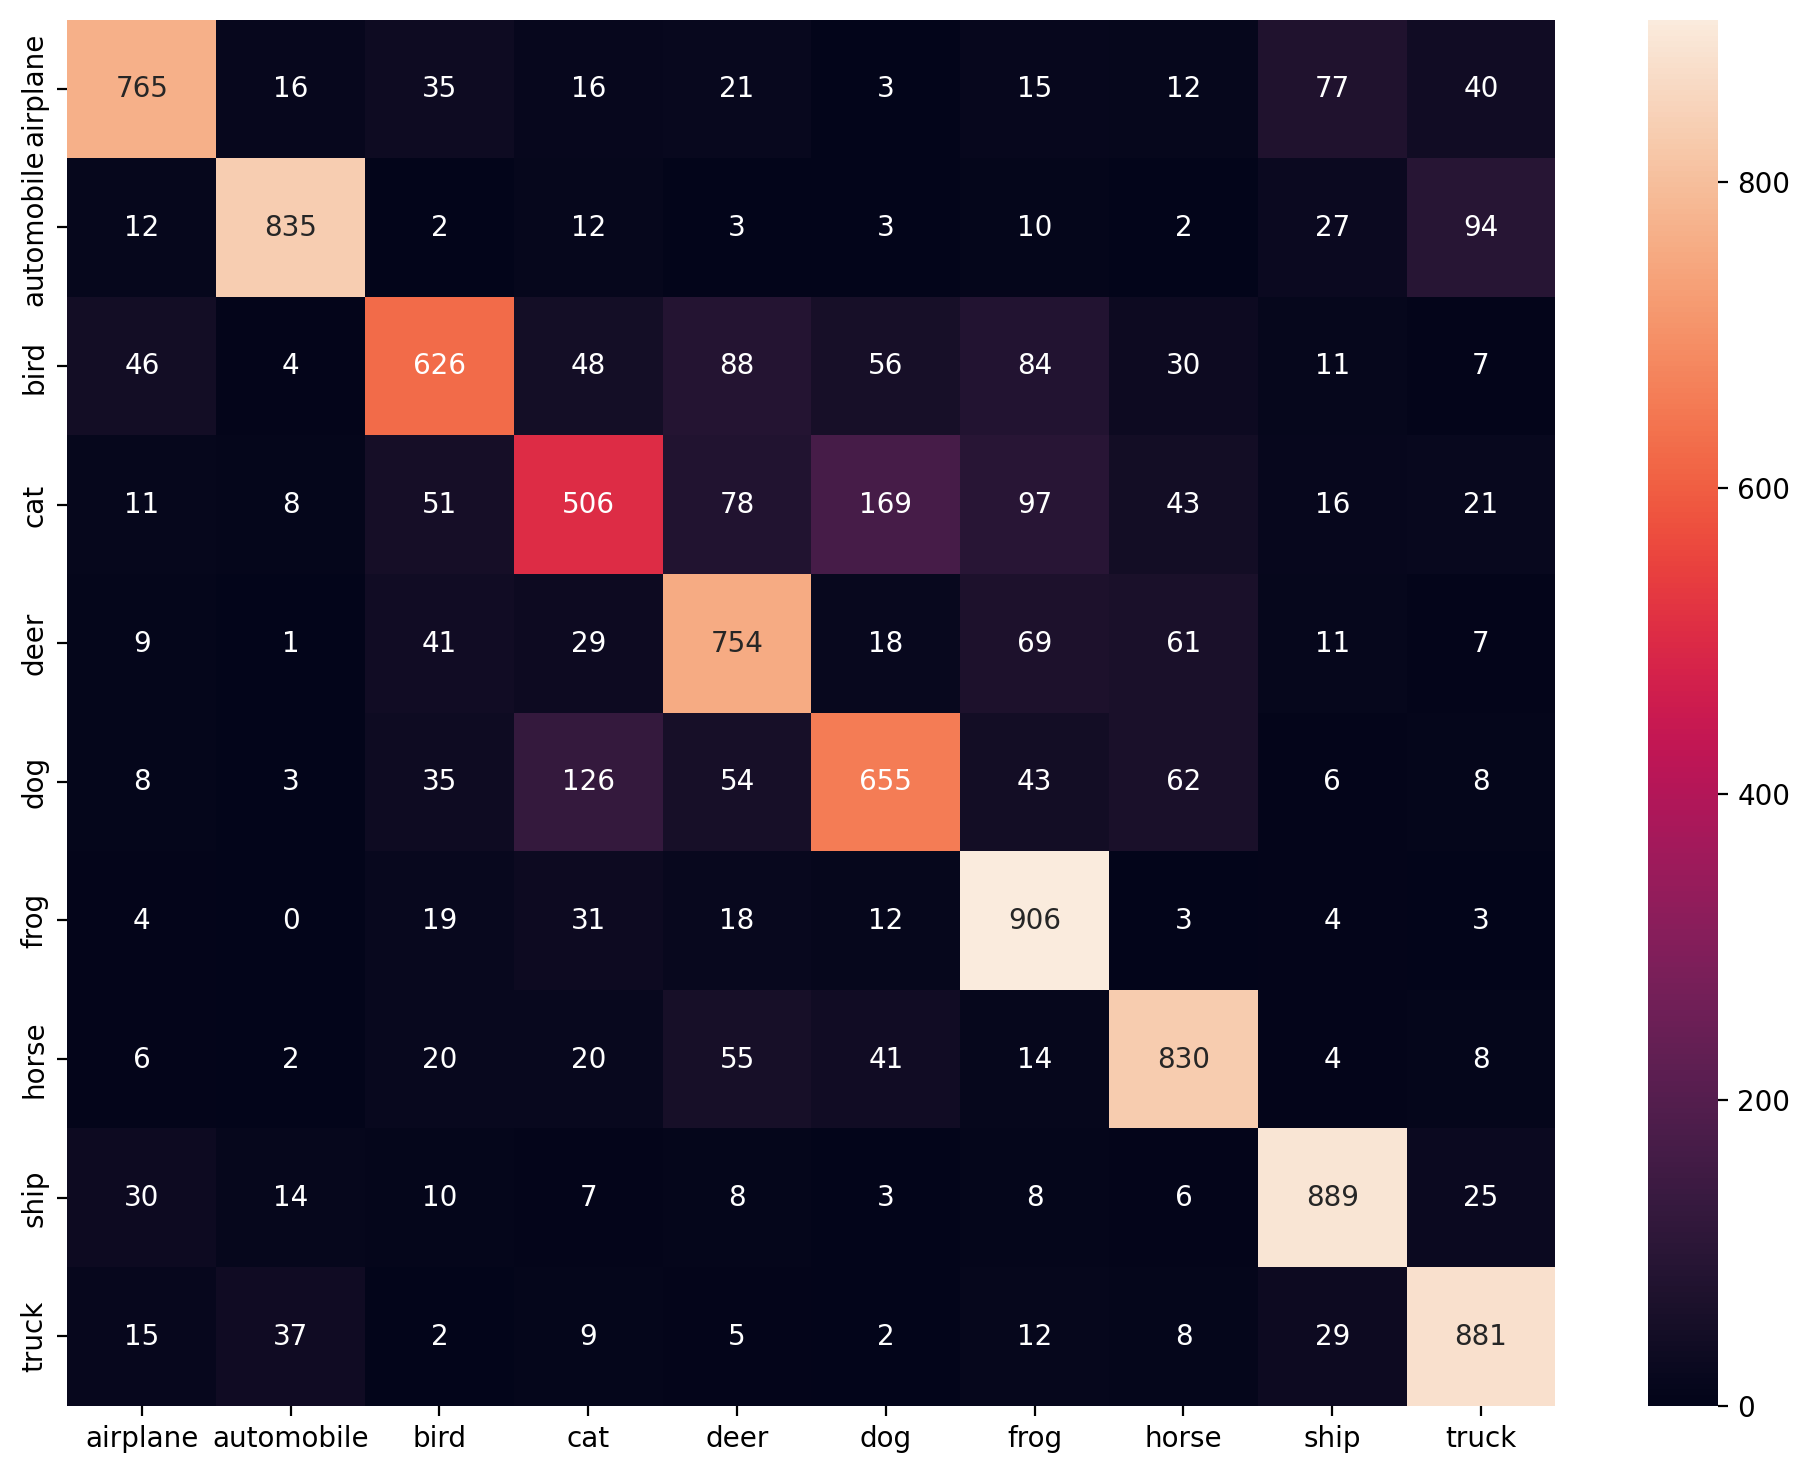

In [12]:
import seaborn as sns
labels = load_label_names()
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=labels, yticklabels=labels)